### Image Classification for prediction of fruits and vegetables using CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Create train, test and validation paths from the datasets

In [2]:
data_train_path='D:/timepass/repos/Image_classification/Fruits_Vegetables/train'
data_test_path='D:/timepass/repos/Image_classification/Fruits_Vegetables/test'
data_validation_path='D:/timepass/repos/Image_classification/Fruits_Vegetables/validation'

Fix height and width for every image

In [3]:
img_width=180
img_height=180

Using created paths to store train sets, test sets and validation sets

This code loads the training dataset from the specified directory, resizes each image to 180x180 pixels, shuffles them, and batches them in groups of 32. It also retrieves class names (e.g., fruit/vegetable names).

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [6]:
data_category=data_train.class_names

In [7]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [8]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


Example of the data being used

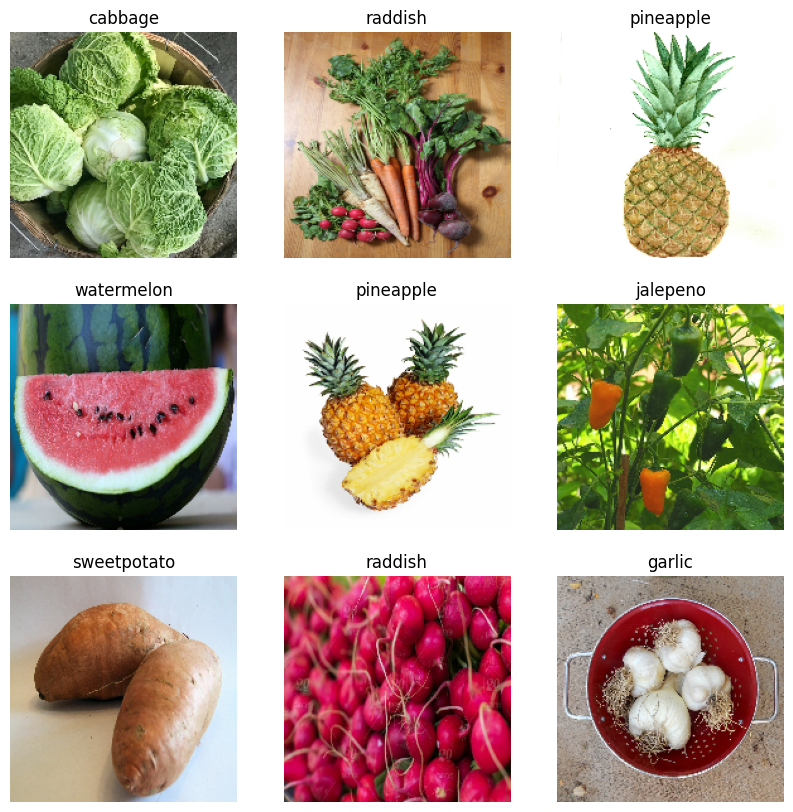

In [10]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Here,a convolutional neural network (CNN) model is created. It consists of multiple convolutional and max-pooling layers, followed by a flattening layer, dropout for regularization, a dense layer, and an output layer with units equal to the number of categories.

In [19]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0,2),
    layers.Dense(128),
    layers.Dense(len(data_category))
])

This code compiles the model using the Adam optimizer, sparse categorical cross-entropy loss (for multi-class classification), and accuracy as the evaluation metric.

In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

This code loads a test image, resizes it, and makes a prediction using the model. The predicted class with the highest score is displayed along with its accuracy.

In [23]:
epochs_size=10
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 571ms/step - accuracy: 0.3237 - loss: 2.4095 - val_accuracy: 0.6211 - val_loss: 1.4674
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 495ms/step - accuracy: 0.4629 - loss: 1.8681 - val_accuracy: 0.7949 - val_loss: 0.8355
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 485ms/step - accuracy: 0.6421 - loss: 1.2692 - val_accuracy: 0.8348 - val_loss: 0.6682
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 529ms/step - accuracy: 0.8134 - loss: 0.6776 - val_accuracy: 0.9145 - val_loss: 0.4838
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 469ms/step - accuracy: 0.9072 - loss: 0.3370 - val_accuracy: 0.9231 - val_loss: 0.4684
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 493ms/step - accuracy: 0.9441 - loss: 0.2275 - val_accuracy: 0.9487 - val_loss: 0.4611
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 503ms/step - accuracy: 0.9695 - loss: 0.1416 - val_accuracy: 0.9430 - val_loss: 0.4771
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 499ms/step - accuracy: 0.9831 - loss: 0.1066 - val_accu

Text(0.5, 1.0, 'Loss')

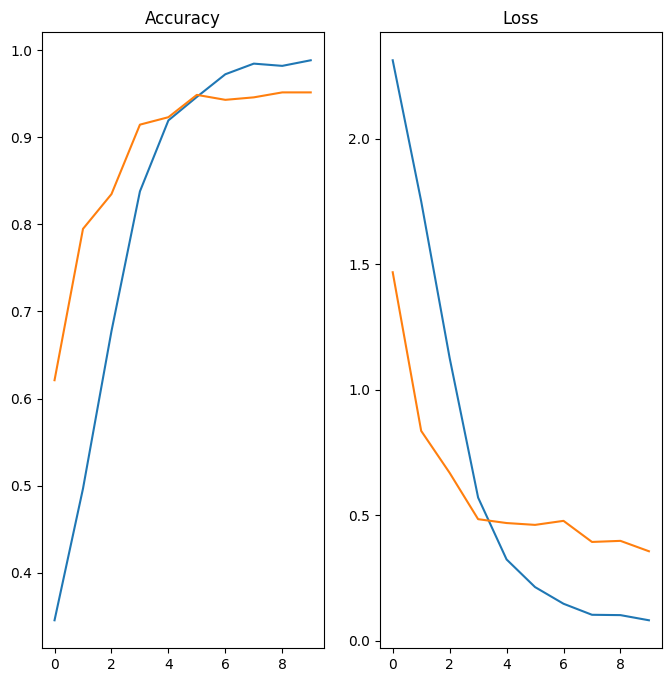

In [26]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy') 

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training accuracy')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss') 

In [37]:
img1='young-jackfruit-isolated-on-white-260nw-1936388404.webp'
img1=tf.keras.utils.load_img(img1,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(img1)
img_bat=tf.expand_dims(img_arr,0)

In [38]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [39]:
score=tf.nn.softmax(predict)

In [40]:
print('Image is of {}...Accuracy={:0.2f}'.format(data_category[np.argmax(score)],np.max(score)*100))

Image is of pear...Accuracy=87.15


In [41]:
model.save('Image_classify.keras')